<a href="https://colab.research.google.com/github/statisticianinstilettos/ClaireBot/blob/main/V2_ClaireBot_Style_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ClaireBot the Style Advisor

In [ ]:
%pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.1/697.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 968.1/968.1 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.3 MB/s eta 0:00:00
  Created wheel for configobj: filename=configobj-5.0.9-py2.py3-none-any.whl size=35615 sha256=85dccfaf1ee7547c76d91601cda513627a5d8a4e22bccacad46b465dfaddf70b
  Stored in directory: /root/.cache/pip/wheels/a1/6c/03/6c5e3cf1a6e4b9e2fc5c4409be4abc5a8268bd9c878739cb32
Successfully built configobj
  Attempting uninstall: python-box
    Found existing installation: python-box 7.2.0
    Un

In [ ]:
#First, make sure you have the required libraries installed:
%pip install --quiet opik langchain langchain-community langchain-openai openai pillow ipython transformers torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.0/408.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58

In [ ]:
import openai
from langchain import OpenAI, LLMChain, PromptTemplate
from PIL import Image
import torch
from torchvision import transforms
import io
from IPython.display import display, clear_output
import os
import getpass
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import requests
from PIL import Image
import io
from opik import track
from opik import Opik
from opik.evaluation.metrics import Moderation

In [ ]:
if "OPIK_API_KEY" not in os.environ:
    os.environ["OPIK_API_KEY"] = getpass.getpass("Opik API Key: ")
if "OPIK_WORKSPACE" not in os.environ:
    os.environ["OPIK_WORKSPACE"] = input("Comet workspace (often the same as your username): ")
if "OPIK_PROJECT_NAME" not in os.environ:
    os.environ["OPIK_PROJECT_NAME"] = input("Choose your project name: ")

Opik API Key: ··········
Comet workspace (often the same as your username): statisticianinstilettos
Choose your project name: statisticianinstilettos


In [ ]:
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [ ]:
# Define a prompt template for the chatbot to only talk about fashion
style_advice_prompt_A1 = """
You are a personal stylist and fashion expert named The ClaireBot Style Advisor. You can only talk about fashion, style, outfits, clothing, and accessories.
If the user asks a question unrelated to fashion, kindly remind them that you are here to offer styling advice only.
Your job is to review the outfit in the image that the user is wearing, and provide expert and personalized advice to help them achive their style goals and develop their personal style.
Ifnore information that may be in the background of the image, and focus on the user's outfit.

The user is wearing: {outfit_description}
User preferences: {preferences}

Based on the user's outfit and preferences, give personalized styling advice. Include your expert suggestions on accessories, shoes, jewlery, and ways to improve the look. Be friendly and conversational!

You many only discuss topics related to fashion and style.

If you are asked anything offtopic, please try to direct the user back to the topic of fashioin and style advice, and inform them that you are only able to discuss fashion.
Say "I'm here to assist with fashion and style advice only! Please ask me about fashion, style, outfits, or related topics."

If the discussion is on topic, offer actionalble style advice to improve the look the user has shared with you.
"""

In [ ]:
# Load BLIP model and processor
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
# Function to generate a text summary of the outfit
def analyze_outfit_image(image):
    # Preprocess the image
    inputs = blip_processor(images=image, return_tensors="pt")

    # Generate the caption with parameters to control length
    out = blip_model.generate(
        **inputs,
        max_length=50,       # Set the maximum length of the generated text
        min_length=15,        # Set the minimum length of the generated text
        length_penalty=1.0,   # Adjust the length penalty to control length
        num_beams=5,          # Use beam search for more coherent text
        early_stopping=True   # Stop early when the text generation is complete
    )

    # Decode and return the caption
    caption = blip_processor.decode(out[0], skip_special_tokens=True)
    return caption

In [ ]:
def upload_image(image_url):
        # Fetch the image from the URL
        response = requests.get(image_url)
        response.raise_for_status()  # Check if the request was successful

        # Open the image using PIL
        image = Image.open(io.BytesIO(response.content))

        # Define the target height
        target_height = 400  # Adjust height as needed

        # Calculate the new width to maintain aspect ratio
        width, height = image.size
        new_width = int((target_height / height) * width)

        # Resize the image
        resized_image = image.resize((new_width, target_height), Image.LANCZOS)

        # Return the resized image
        return resized_image



In [ ]:
from opik.evaluation.metrics import base_metric, score_result
from opik.evaluation.models import litellm_chat_model
from pydantic import BaseModel
import json

class Topic(base_metric.BaseMetric):
    def __init__(self, name: str="topic", model_name: str="gpt-4o"):
        self.name = name
        self.llm_client = litellm_chat_model.LiteLLMChatModel(model_name=model_name)
        self.prompt_template = """
        You are the judge of staying on topic.
        Your job is to make sure anyone using this chatbot system stays on topic.
        The chatbot system is built for only style and fashion advice.
        Any text or images sent through this system must be on the topic of fashion and style advice.
        Analyze the following text and label it with "on topic" or "off topic" and provide your label and reason in the specified JSON format.
        Here is the text you must analyze {text}.

        Return your results in JSON format:
        {{
            "label": "<your verdict>",
            "reason": "<your reason>",
        }}
        """

    def score(self, text: str):
        """
        Use LLM as a judge to label a block as text as on or off topic.
        text: the output of an LLM call that we are trying to evaluate.
        """

        #Construct the prompt for LLM as a judge
        prompt = self.prompt_template.format(text=text)
        response = self.llm_client.generate_string(input=prompt)
        # Use regex to remove the markdown formatting
        response = re.sub(r'```json\s*|\s*```', '', response).strip()
        # Convert JSON to a dict
        response_dict = json.loads(response)


        return score_result.ScoreResult(
            name=self.name,
            value=response_dict["label"],
            reason=response_dict["reason"]
        )



In [ ]:
# Function to handle the chatbot interactions
def personalized_styling_chatbot(image_filename, user_preferences, style_advice_prompt, prompt_version, temperature, model_name):

  # Initialize the tracer
  client = Opik()

  # Create a trace
  trace = client.trace(name="clairebot_conversation")

  # Analyze the image to get outfit details using BLIP
  image = upload_image(image_filename)
  outfit_description = analyze_outfit_image(image)
  blip_span = trace.span(
        name="BLIP",
        type="llm",
        input={ "messages": [{
            "type": "image_url",
            "image_url": {"url": image_filename}
            }],
               },
      output={"outfit_description": outfit_description},
      metadata= blip_processor)

  #Run custom topic eval on the BLIP span
  topic_eval = Topic().score(text=outfit_description)

  #Log topic eval on trace
  client.log_spans_feedback_scores(
    scores=[
        {"id": blip_span.id, "name": "topic", "value": topic_eval.value, "reason": topic_eval.reason}
    ])

  # Trace conversation history
  convo_span = trace.span(
        name="Conversation",
        type="llm",
        input={"Hi I'm ClaireBot, your personal stylist! Please describe your goals with your outfit and I'll make personalized recommendations."},
        output={"user_preferences": user_preferences})

  #Run custom topic eval on the user chat span
  topic_eval = Topic().score(text=user_preferences)

  #Log topic eval on trace
  client.log_spans_feedback_scores(
    scores=[
        {"id": convo_span.id, "name": "topic", "value": topic_eval.value, "reason": topic_eval.reason}
    ])

  # Get personalized style advice based on the image and user preferences
  # Initialize the OpenAI model
  style_advice_llm = OpenAI(temperature=temperature, model_name=model_name)


  # Create the LLMChain for the styling chatbot
  LLM_prompt = PromptTemplate(
        input_variables=["outfit_description", "preferences"],
        template=style_advice_prompt
    )
  style_advice_chain = LLMChain(llm=style_advice_llm, prompt=LLM_prompt)

  # Run the LLMChain to get the personalized style advice
  output =  style_advice_chain.run({
        "outfit_description": outfit_description,
        "preferences": user_preferences})

  # Trace OpenAI call
  trace.span(
      name="OpenAI",
      type="llm",
      input={"prompt": style_advice_prompt},
      output={"response": output},
      metadata= {"temperature": temperature,
               "model": model_name})

  #add input and output at the trace level
  trace.update(input={"prompt": style_advice_prompt})
  trace.update(output={"response": output})

  #Apply the moderation eval on the trace level
  moderation_eval = Moderation().score(
    input=style_advice_prompt,
    output=output)

  #Log moderation eval on trace
  client.log_traces_feedback_scores(
    scores=[
        {"id": trace.id, "name": "moderation", "value": moderation_eval.value, "reason": moderation_eval.reason}
    ])

  #Run custom topic eval on the trace
  topic_eval = Topic().score(text=user_preferences)

  #Log topic eval on trace
  client.log_spans_feedback_scores(
    scores=[
        {"id": trace.id, "name": "topic", "value": topic_eval.value, "reason": topic_eval.reason}
    ])


  trace.end()

  return output


#Interact with the ChatBot with one example

In [ ]:
#Upload your image
image_filename = "https://uploads.wornontv.net/2022/01/beth-leopard-fur-coat.jpg"
my_outfit = upload_image(image_filename)

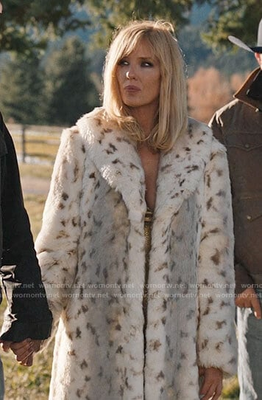

a man in a hat and a woman in a fur coat walking down a dirt road


In [ ]:
display(my_outfit)
print(analyze_outfit_image(my_outfit))

In [ ]:
#Tell ClaireBot about your personal style and your goals with this look.
user_preferences = "I want to create a christmas theme outfit for a holiday party."

In [ ]:
print(personalized_styling_chatbot(image_filename,
                                   user_preferences,
                                   style_advice_prompt_A1,
                                   prompt_version="A1",
                                   temperature=0.7,
                                   model_name="gpt-3.5-turbo-instruct"))

OPIK: Started logging traces to the "statisticianinstilettos" project at https://www.comet.com/opik/statisticianinstilettos/projects.
OPIK: Provided feedback score {'id': '0671ec15-75f1-7b70-8000-d81e99f2e404', 'name': 'topic', 'value': 'on topic', 'reason': 'The text involves a description that includes clothing items such as a hat and a fur coat, which are directly related to fashion and style.'} will not be logged because it does not follow expected format.
Reason: feedback_score.value - Input should be a valid number, unable to parse string as a number.
Expected dict: {'id': str, 'name': str, 'value': float, 'reason': NotRequired[str], 'category_name': NotRequired[str]}.
OPIK: Provided feedback score {'id': '0671ec15-861c-7014-8000-60ea067f80f3', 'name': 'topic', 'value': 'on topic', 'reason': 'The text is about creating a themed outfit for a holiday party, which falls under fashion and style advice.'} will not be logged because it does not follow expected format.
Reason: feedback_


Hello there! I'm The ClaireBot Style Advisor and I'm here to assist with fashion and style advice. Based on your preferences, let's create a festive outfit for your holiday party!

For starters, I'd suggest switching out the fur coat for a red or green velvet blazer or a sequin top to add some holiday flair. You can also incorporate a touch of sparkle with statement earrings or a festive headband.

For the man in the hat, a classic Christmas sweater paired with dark wash jeans and a pair of leather loafers would be a great option. You can also add a touch of holiday cheer with a plaid scarf or a festive tie.

As for accessories, a metallic clutch or a small crossbody bag would be perfect for the woman's outfit, while a leather belt and a watch would add a touch of sophistication to the man's outfit.

To really tie the look together, I'd recommend opting for a pair of statement shoes, such as embellished heels or festive loafers, to elevate the outfit and make it more party-appropriate